## **23.02.06 small dK and long range**

In [2]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *

In [3]:
DF = 'Review/23.02.06 small dK and long range/'
Create_Folder(DF)

In [4]:
N = 500
dist = 'Normal'
t_end = 400
ss = 14
N = 500
dK = 0.02
dt = 0.1
m = 0
applys = [1]
save = True
ms = [6]
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in tqdm(ms):
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10\
                ,second_initial_state = True,Init_dtheta_omega = False)
    df_sets[m] = df
    rdf_sets[m] = rdf

100%|██████████| 1/1 [40:19<00:00, 2419.90s/it]


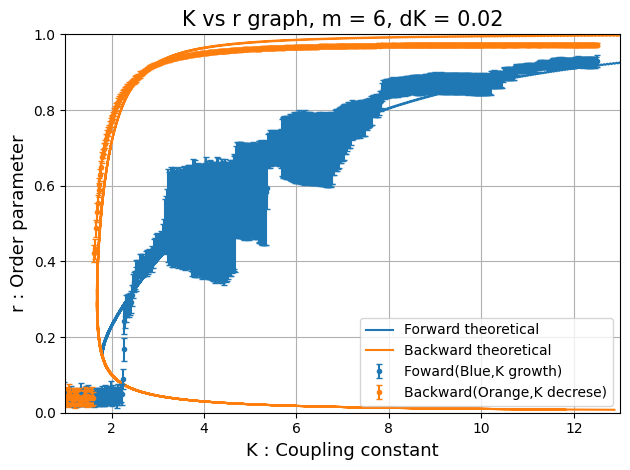

In [5]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist} not r=0/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Foward(Blue,K growth)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Backward(Orange,K decrese)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, dK = {dK}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist} not r=0/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)